# Importing

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing Data

path = r'C:\Users\mkock\Desktop\Data Analytics\Data Immersion\Achievement 4\22-03-2022 Instacart Basket Analysis'

ords_prods_cust_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

df_normal_activity = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'normal_activity.pkl'))

# Part 1

# Task: Question 2

In [3]:
# Review data security and PII data

ords_prods_cust_merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,surname,gender,state,age,date_joined,#_of_dependants,fam_status,income
0,2539329,1,prior,1,2,8,0.0,196,1,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


First and last names are present in the dataset - Discuss with a supervisor or with the client on how to proceed with PII data

# Task: Question 3

In [4]:
# Creating a list of regions

region = []

for value in ords_prods_cust_merged['state']:
    if (value in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']):
        region.append('Northeast')
    elif (value in ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']):
        region.append('Midwest')
    elif (value in ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']):
        region.append('South')
    else:
        region.append('West')

In [5]:
region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [6]:
# Creating the new column

ords_prods_cust_merged['region'] = region

In [7]:
ords_prods_cust_merged['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [8]:
# Confirm that state counts matches with regional counts using Excel functions

ords_prods_cust_merged['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [9]:
pd.set_option('display.max_columns', None)
ords_prods_cust_merged.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest day,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,first_name,surname,gender,state,age,date_joined,#_of_dependants,fam_status,income,region
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [10]:
# Creating a spending flag per region

crosstab_1 = pd.crosstab(ords_prods_cust_merged['region'], ords_prods_cust_merged['spending_flag'], dropna = False)

In [11]:
crosstab_1

spending_flag,High Spender,Low Spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Most high spenders are located in the south, but also a lot more low spenders in the south, using percentages might give a better ideo on spending habits

In [12]:
# Calculating percentage of high spenders in each region

Midwest = (155975 / (155975+7441350)) * 100
Northeast = (108225 / (108225+5614511)) * 100
South = (209691 / (209691+10582194)) * 100
West = (160354 / (160354+8132559)) * 100

In [13]:
Midwest

2.053025242437305

In [14]:
Northeast

1.8911408808653762

In [15]:
South

1.9430433144904713

In [16]:
West

1.9336269414619447

In [17]:
Region_bar = ['Midwest', 'Northeast', 'South', 'West']
Percentage_bar = [2.053, 1.891, 1.943, 1.934]

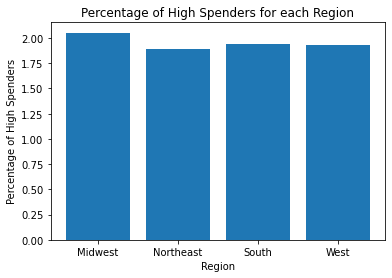

In [18]:
plt.bar(Region_bar,Percentage_bar)
plt.title('Percentage of High Spenders for each Region')
plt.xlabel('Region')
plt.ylabel('Percentage of High Spenders')
plt.show()

# Task: Question 4

In [19]:
# Creating low activity flag for less than 5 orders

ords_prods_cust_merged.loc[ords_prods_cust_merged['max_order'] < 5, 'activity_flag'] = 'Low activity'

In [20]:
# Creating normal to high activity flag for >=5 orders

ords_prods_cust_merged.loc[ords_prods_cust_merged['max_order'] >= 5, 'activity_flag'] = 'Normal to high activity'

In [21]:
ords_prods_cust_merged['activity_flag'].value_counts(dropna = False)

Normal to high activity    30964564
Low activity                1440295
Name: activity_flag, dtype: int64

In [22]:
# Creating separate subsets for low and normal to high activity

df_low_activity = ords_prods_cust_merged[ords_prods_cust_merged['activity_flag']=='Low activity']
df_normal_activity = ords_prods_cust_merged[ords_prods_cust_merged['activity_flag']=='Normal to high activity']

In [23]:
# Export separate subsets

df_low_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','low_activity.pkl'))

In [24]:
df_normal_activity.to_pickle(os.path.join(path,'02 Data','Prepared Data','normal_activity.pkl'))

# Task: Question 5

Compare variable counts for each identifying column - age, income, #_of_dependants

Create variables based on above

Create Groups - High income parent/non-parent; mid income parent/non-parent; low income parent/non-parent
Create Groups - Young parent/non-parent; mid-aged parent/non-parent; older parent/non-parent

In [23]:
df_normal_activity.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,Busiest day,busiest_period_of_day,max_order,loyalty_flag,spending,spending_flag,frequency,frequency_flag,first_name,surname,gender,state,age,date_joined,#_of_dependants,fam_status,income,region,activity_flag
0,2539329,1,prior,1,2,8,0.0,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal to high activity
1,2398795,1,prior,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal to high activity
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Most_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal to high activity
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal to high activity
4,431534,1,prior,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Most_orders,10,New customer,6.367797,Low Spender,20.0,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,Normal to high activity


In [24]:
df_normal_activity[['age','income', '#_of_dependants']].mean()

age                   49.468026
income             99675.865108
#_of_dependants        1.501819
dtype: float64

In [25]:
df_normal_activity['#_of_dependants'].value_counts(dropna = False).sort_index()

0    7739681
1    7719106
2    7733261
3    7772516
Name: #_of_dependants, dtype: int64

age group defined as:
    Young <=30;
    Mid-aged >30; <=50;
    Old > 50
    
income group defined as
    high income >= 110 000;
    mid income > 50 000; <110 000;
    low income <= 50 000
    
#_of_dependants group defined as
    parent >= 1;
    non-parent = 0

In [26]:
# Creating age variables

age_group = []

for value in df_normal_activity['age']:
    if (value <= 30): 
        age_group.append('young')
    elif (value >= 31) & (value <= 50):
        age_group.append('mid_aged')
    elif (value >= 51):
        age_group.append('old')

In [27]:
# Creating income variables

income_group = []

for value in df_normal_activity['income']:
    if (value <= 50000): 
        income_group.append('low_income')
    elif (value > 50000) & (value < 110000):
        income_group.append('mid_income')
    elif (value >= 110000):
        income_group.append('high_income')

In [28]:
# Creating #_of_dependants variables

dependants_group = []

for value in df_normal_activity['#_of_dependants']:
    if (value == 0): 
        dependants_group.append('non_parent')
    elif (value > 0):
        dependants_group.append('parent')

In [29]:
# Add columns

df_normal_activity['age_group'] = age_group
df_normal_activity['income_group'] = income_group
df_normal_activity['dependants_group'] = dependants_group

C:\Users\mkock\AppData\Local\Temp/ipykernel_13548/2398341771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['age_group'] = age_group
C:\Users\mkock\AppData\Local\Temp/ipykernel_13548/2398341771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normal_activity['income_group'] = income_group
C:\Users\mkock\AppData\Local\Temp/ipykernel_13548/2398341771.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [30]:
# Creating customer profiles based on income and dependants groups

df_normal_activity.loc[(df_normal_activity['income_group'] == 'low_income') & (df_normal_activity['dependants_group'] == 'parent'), 'income_vs_dependants_loc'] = 'low income parent'

df_normal_activity.loc[(df_normal_activity['income_group'] == 'low_income') & (df_normal_activity['dependants_group'] == 'non_parent'), 'income_vs_dependants_loc'] = 'low income non-parent'

df_normal_activity.loc[(df_normal_activity['income_group'] == 'mid_income') & (df_normal_activity['dependants_group'] == 'parent'), 'income_vs_dependants_loc'] = 'mid income parent'

df_normal_activity.loc[(df_normal_activity['income_group'] == 'mid_income') & (df_normal_activity['dependants_group'] == 'non_parent'), 'income_vs_dependants_loc'] = 'mid income non-parent'

df_normal_activity.loc[(df_normal_activity['income_group'] == 'high_income') & (df_normal_activity['dependants_group'] == 'parent'), 'income_vs_dependants_loc'] = 'high income parent'

df_normal_activity.loc[(df_normal_activity['income_group'] == 'high_income') & (df_normal_activity['dependants_group'] == 'non_parent'), 'income_vs_dependants_loc'] = 'low income non-parent'

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [31]:
# Creating customer profiles based on age and dependants groups

df_normal_activity.loc[(df_normal_activity['age_group'] == 'young') & (df_normal_activity['dependants_group'] == 'parent'), 'age_vs_dependants_loc'] = 'young parent'

df_normal_activity.loc[(df_normal_activity['age_group'] == 'young') & (df_normal_activity['dependants_group'] == 'non_parent'), 'age_vs_dependants_loc'] = 'young non-parent'

df_normal_activity.loc[(df_normal_activity['age_group'] == 'mid_aged') & (df_normal_activity['dependants_group'] == 'parent'), 'age_vs_dependants_loc'] = 'mid-aged parent'

df_normal_activity.loc[(df_normal_activity['age_group'] == 'mid_aged') & (df_normal_activity['dependants_group'] == 'non_parent'), 'age_vs_dependants_loc'] = 'mid-aged non-parent'

df_normal_activity.loc[(df_normal_activity['age_group'] == 'old') & (df_normal_activity['dependants_group'] == 'parent'), 'age_vs_dependants_loc'] = 'old parent'

df_normal_activity.loc[(df_normal_activity['age_group'] == 'old') & (df_normal_activity['dependants_group'] == 'non_parent'), 'age_vs_dependants_loc'] = 'old non-parent'

# Task: Question 6

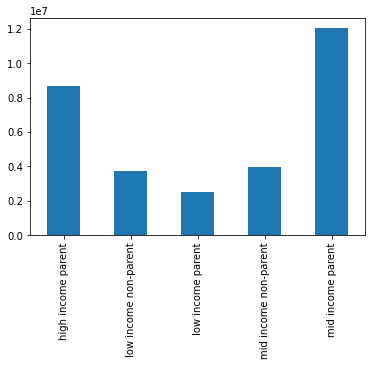

In [32]:
income_vs_dependants = df_normal_activity['income_vs_dependants_loc'].value_counts().sort_index().plot.bar()

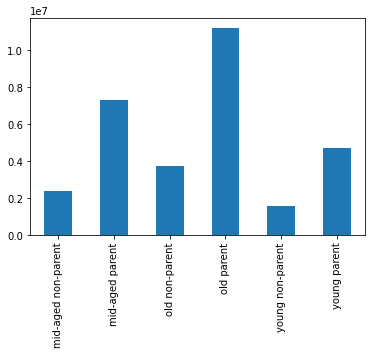

In [33]:
age_vs_dependants = df_normal_activity['age_vs_dependants_loc'].value_counts().sort_index().plot.bar()

# Task: Question 7

In [34]:
# Order Number for income vs dependants

df_normal_activity.groupby('income_vs_dependants_loc').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                                 mean min max
income_vs_dependants_loc                     
high income parent          17.823626   1  99
low income non-parent       17.999343   1  99
low income parent           16.695725   1  99
mid income non-parent       17.918953   1  99
mid income parent           17.999949   1  99

In [35]:
# Prices for income vs dependants

df_normal_activity.groupby('income_vs_dependants_loc').agg({'prices': ['mean', 'min', 'max']})

prices              
                               mean  min      max
income_vs_dependants_loc                         
high income parent        17.982646  1.0  99999.0
low income non-parent     15.508787  1.0  99999.0
low income parent          6.704509  1.0     25.0
mid income non-parent      8.898121  1.0  99999.0
mid income parent          8.564641  1.0  99999.0

In [36]:
# Day of week for income vs dependants

df_normal_activity.groupby('income_vs_dependants_loc').agg({'order_dow': ['mean', 'min', 'max']})

order_dow        
                              mean min max
income_vs_dependants_loc                  
high income parent        2.744978   0   6
low income non-parent     2.752225   0   6
low income parent         2.745738   0   6
mid income non-parent     2.721227   0   6
mid income parent         2.741218   0   6

In [37]:
# Hour of day for income vs dependants

df_normal_activity.groupby('income_vs_dependants_loc').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                                      mean min max
income_vs_dependants_loc                          
high income parent               13.444378   0  23
low income non-parent            13.404698   0  23
low income parent                13.227500   0  23
mid income non-parent            13.436693   0  23
mid income parent                13.418721   0  23

In [38]:
# Order Number for age vs dependants

df_normal_activity.groupby('age_vs_dependants_loc').agg({'order_number': ['mean', 'min', 'max']})

order_number        
                              mean min max
age_vs_dependants_loc                     
mid-aged non-parent      17.805690   1  99
mid-aged parent          17.982066   1  99
old non-parent           18.202012   1  99
old parent               17.676896   1  99
young non-parent         17.607418   1  99
young parent             17.775025   1  99

In [39]:
# Prices for age vs dependants

df_normal_activity.groupby('age_vs_dependants_loc').agg({'prices': ['mean', 'min', 'max']})

prices              
                            mean  min      max
age_vs_dependants_loc                         
mid-aged non-parent    12.732088  1.0  99999.0
mid-aged parent        11.760748  1.0  99999.0
old non-parent         11.575605  1.0  99999.0
old parent             11.910807  1.0  99999.0
young non-parent       12.399571  1.0  99999.0
young parent           11.977369  1.0  99999.0

In [40]:
# day of week for age vs dependants

df_normal_activity.groupby('age_vs_dependants_loc').agg({'order_dow': ['mean', 'min', 'max']})

order_dow        
                           mean min max
age_vs_dependants_loc                  
mid-aged non-parent    2.731698   0   6
mid-aged parent        2.739152   0   6
old non-parent         2.744263   0   6
old parent             2.745280   0   6
young non-parent       2.724078   0   6
young parent           2.744095   0   6

In [41]:
# hour of day for age vs dependants

df_normal_activity.groupby('age_vs_dependants_loc').agg({'order_hour_of_day': ['mean', 'min', 'max']})

order_hour_of_day        
                                   mean min max
age_vs_dependants_loc                          
mid-aged non-parent           13.404928   0  23
mid-aged parent               13.418307   0  23
old non-parent                13.431395   0  23
old parent                    13.407934   0  23
young non-parent              13.421642   0  23
young parent                  13.390183   0  23

# Task: Question 8

In [44]:
# income_vs_dependants compared to region

pd.crosstab(df_normal_activity['income_vs_dependants_loc'], df_normal_activity['region'], dropna = False, normalize = 'index')

region,Midwest,Northeast,South,West
income_vs_dependants_loc,,,,
high income parent,0.237910,0.179313,0.328345,0.254432
low income non-parent,0.235779,0.175669,0.334262,0.254290
low income parent,0.234945,0.172071,0.339163,0.253822
mid income non-parent,0.235268,0.174380,0.332971,0.257381
mid income parent,0.231328,0.176316,0.334673,0.257683


In [45]:
# income_vs_dependants compared to departments

pd.crosstab(df_normal_activity['income_vs_dependants_loc'], df_normal_activity['department_id'], dropna = False, normalize = 'index')

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_vs_dependants_loc,,,,,,,,,,,,,,,,,,,,,
high income parent,0.069591,0.001112,0.037016,0.297304,0.004879,0.008356,0.079051,0.003121,0.027747,0.000978,0.013662,0.023896,0.059217,0.020941,0.034564,0.169863,0.022844,0.013736,0.077534,0.032475,0.002115
low income non-parent,0.068537,0.001153,0.035912,0.286769,0.005266,0.008106,0.086945,0.003205,0.025629,0.001049,0.013801,0.020081,0.057027,0.022326,0.031348,0.165143,0.023080,0.012381,0.097646,0.032584,0.002012
low income parent,0.064016,0.001106,0.031903,0.246173,0.005456,0.006392,0.114201,0.002539,0.019033,0.001443,0.014070,0.010143,0.049385,0.027272,0.023459,0.148313,0.026125,0.008720,0.166886,0.031450,0.001913
mid income non-parent,0.068260,0.001100,0.036776,0.300797,0.004280,0.008538,0.080028,0.002903,0.027118,0.001019,0.013648,0.022703,0.057663,0.020730,0.033453,0.169211,0.021256,0.014262,0.081269,0.032883,0.002103
mid income parent,0.068775,0.001103,0.036402,0.299596,0.004301,0.008556,0.079232,0.002992,0.027360,0.001108,0.013643,0.022943,0.058239,0.021119,0.033422,0.169196,0.021989,0.013791,0.081725,0.032376,0.002133


In [46]:
# age_vs_dependants compared to region

pd.crosstab(df_normal_activity['age_vs_dependants_loc'], df_normal_activity['region'], dropna = False, normalize = 'index')

region,Midwest,Northeast,South,West
age_vs_dependants_loc,,,,
mid-aged non-parent,0.241205,0.167892,0.335426,0.255476
mid-aged parent,0.236389,0.176755,0.332988,0.253868
old non-parent,0.236053,0.177009,0.327800,0.259137
old parent,0.232877,0.178073,0.331762,0.257288
young non-parent,0.225529,0.181093,0.344651,0.248726
young parent,0.233827,0.174714,0.334957,0.256502


In [47]:
# age_vs_dependants compared to departments

pd.crosstab(df_normal_activity['age_vs_dependants_loc'], df_normal_activity['department_id'], dropna = False, normalize = 'index')

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_vs_dependants_loc,,,,,,,,,,,,,,,,,,,,,
mid-aged non-parent,0.068284,0.001174,0.036833,0.293921,0.005115,0.008343,0.083757,0.003159,0.025896,0.001051,0.013695,0.021376,0.057053,0.021559,0.032511,0.167066,0.021830,0.013348,0.089008,0.032836,0.002184
mid-aged parent,0.067871,0.001049,0.036030,0.294016,0.004618,0.008320,0.082009,0.002876,0.026387,0.001100,0.013662,0.021768,0.057695,0.021746,0.032489,0.168746,0.022722,0.013568,0.088961,0.032299,0.002066
old non-parent,0.069117,0.001093,0.036150,0.293792,0.004647,0.008201,0.083233,0.002970,0.026448,0.001009,0.013649,0.021493,0.057470,0.021479,0.032179,0.167837,0.022163,0.013006,0.089304,0.032846,0.001914
old parent,0.068855,0.001109,0.036239,0.292817,0.004529,0.008185,0.083929,0.003011,0.026679,0.001084,0.013723,0.022041,0.057736,0.021603,0.032825,0.165799,0.022897,0.013065,0.089451,0.032319,0.002104
young non-parent,0.066835,0.001133,0.036126,0.294604,0.004478,0.008612,0.083158,0.003072,0.027034,0.001066,0.013937,0.021374,0.057540,0.021477,0.032919,0.166073,0.022562,0.014177,0.089281,0.032329,0.002212
young parent,0.068944,0.001190,0.036094,0.291639,0.004944,0.008280,0.082100,0.003120,0.026755,0.001116,0.013687,0.021829,0.057353,0.021950,0.033070,0.168041,0.022473,0.013056,0.089887,0.032317,0.002156


# Task: Question 9

Text(0, 0.5, 'frequency')

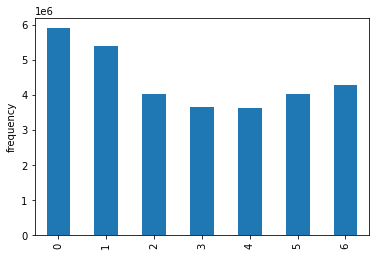

In [73]:
# 1- Busiest days of the week - bar chart

bar_dow = df_normal_activity['order_dow'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [74]:
# Export

bar_dow.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dow.png'))

Text(0, 0.5, 'frequency')

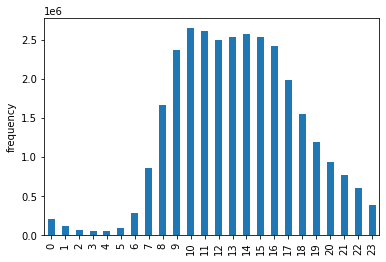

In [75]:
# 1- Busiest hours of the day - bar chart

bar_hod = df_normal_activity['order_hour_of_day'].value_counts().sort_index().plot.bar()
plt.ylabel('frequency')

In [76]:
# Export

bar_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_hod.png'))

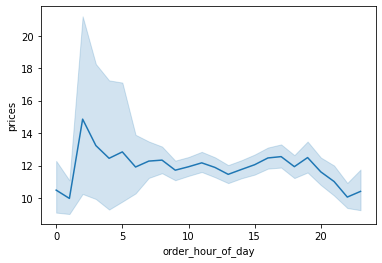

In [77]:
# 2- Time of day people spend the most money - line chart

line_prices_hod = sns.lineplot(data = df_normal_activity, x = 'order_hour_of_day',y = 'prices')

In [79]:
# Export

line_prices_hod.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hod.png'))

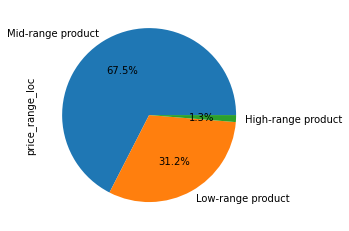

In [80]:
# 3- Price range grouping - pie chart

pie_price_range = df_normal_activity['price_range_loc'].value_counts().plot.pie(autopct = '%1.1f%%')

In [81]:
# Export

pie_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_price_range.png'))

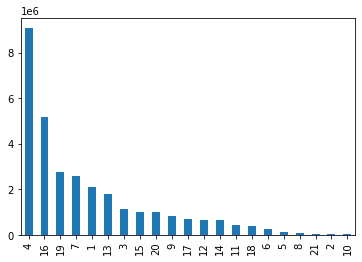

In [88]:
# 4 - Popularity of products by department - bar chart

bar_prod_popularity = df_normal_activity['department_id'].value_counts().plot.bar()

In [90]:
# Export

bar_prod_popularity.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_prod_popularity.png'))

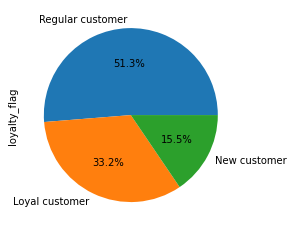

In [91]:
# 5.1- Customer loyalty 

pie_cust_loyalty = df_normal_activity['loyalty_flag'].value_counts().plot.pie(autopct = '%1.1f%%')

In [92]:
# Export

pie_cust_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_cust_loyalty.png'))

In [50]:
# 5.2- Ordering habits vs loyalty

loyalty_spend_habits = pd.crosstab(df_normal_activity['spending_flag'], df_normal_activity['loyalty_flag'], dropna = False, normalize='index')

In [51]:
loyalty_spend_habits

loyalty_flag,Loyal customer,New customer,Regular customer
spending_flag,,,
High Spender,0.358951,0.139224,0.501825
Low Spender,0.331591,0.155451,0.512957


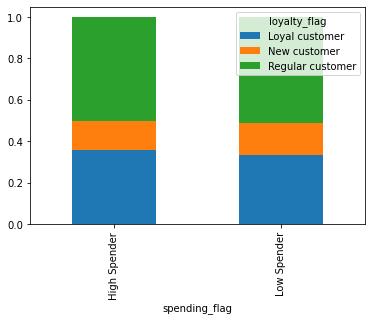

In [52]:
stacked_loyalty_spend_habits = loyalty_spend_habits.plot(kind = 'bar', stacked = True)

In [56]:
# Export

stacked_loyalty_spend_habits.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_loyalty_spend_habits.png'))

In [53]:
# 5.3 Spending habits vs region

region_spend_habits = pd.crosstab(df_normal_activity['spending_flag'], df_normal_activity['region'], dropna = False, normalize='index')

In [54]:
region_spend_habits

region,Midwest,Northeast,South,West
spending_flag,,,,
High Spender,0.246390,0.170891,0.330346,0.252373
Low Spender,0.234274,0.176593,0.333051,0.256082


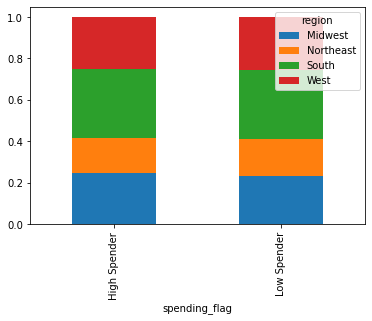

In [55]:
stacked_region_spend_habits = region_spend_habits.plot(kind = 'bar', stacked = True)

In [57]:
# Export

stacked_region_spend_habits.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stacked_region_spend_habits.png'))

In [58]:
# 5.4 age/family status vs spending habits

age_family_spend_habits = pd.crosstab(df_normal_activity['spending_flag'], df_normal_activity['age_vs_dependants_loc'], dropna = False, normalize='index')

In [59]:
age_family_spend_habits

age_vs_dependants_loc,mid-aged non-parent,mid-aged parent,old non-parent,old parent,young non-parent,young parent
spending_flag,,,,,,
High Spender,0.083266,0.247849,0.118447,0.359952,0.040308,0.150178
Low Spender,0.077600,0.235729,0.121490,0.361326,0.051021,0.152835


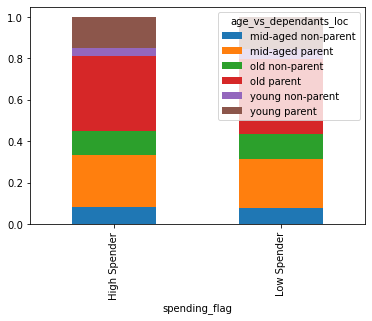

In [60]:
age_family_spend_habits = age_family_spend_habits.plot(kind = 'bar', stacked = True)

In [61]:
# Export

age_family_spend_habits.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_spend_habits.png'))